In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [41]:
goog_data = pd.read_csv('GOOG.csv', index_col='Date', parse_dates=True)
goog_data = goog_data.loc['2015-01-01':'2017-01-01']

<h2>Bollinger Bands</h2>

In [42]:
import statistics as stats 
import math as math

In [43]:
time_period = 20 #History of SMA for middle band
stdev_factor = 2 #Scaling factor for upper and lower bands

In [44]:
history = [] #price history
sma_values = [] #Moving avg of prices
upper_band = [] #Uppeer band values
lower_band = [] #Lower band values
close = goog_data['Adj Close']

for close_price in close:
    history.append(close_price)
    if len(history) > time_period :
        del(history[0])

    sma = stats.mean(history)
    sma_values.append(sma) #SMA or the middle band

    variance = 0 #Variance is the square of standard deviation

    for hist_price in history:
        variance = variance + ((hist_price - sma ) ** 2)

    stdev = math.sqrt(variance / len(history)) #Use SQRT to get stdev
    upper_band.append(sma + stdev_factor * stdev)
    lower_band.append(sma - stdev_factor * stdev)

In [45]:
goog_data = goog_data.assign(ClosePrice=pd.Series(close,index=goog_data.index))
goog_data =goog_data.assign(MiddleBollingerBand20DaySMA=pd.Series(sma_values,index=goog_data.index))
goog_data =goog_data.assign(UpperBollingerBand20DaySMA2StdevFactor=pd.Series(upper_band, index=goog_data.index))
goog_data =goog_data.assign(LowerBollingerBand20DaySMA2StdevFactor=pd.Series(lower_band, index=goog_data.index))
close_price = goog_data['ClosePrice']
mband = goog_data['MiddleBollingerBand20DaySMA']
uband = goog_data['UpperBollingerBand20DaySMA2StdevFactor']
lband = goog_data['LowerBollingerBand20DaySMA2StdevFactor']


Text(0.5, 1.0, 'Bollinger Bands Long method')

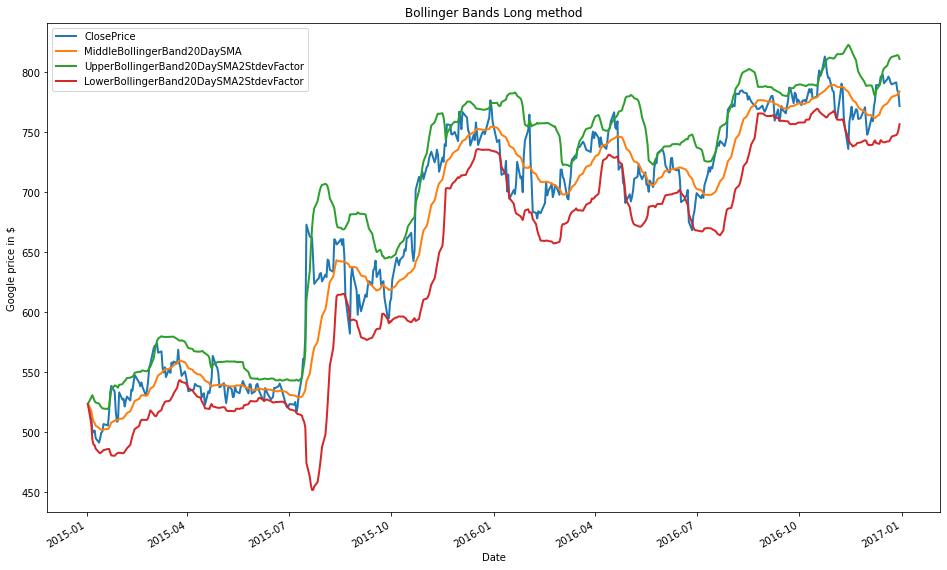

In [46]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1,lw=2., legend=True)
mband.plot(ax=ax1,  lw=2., legend=True)
uband.plot(ax=ax1,  lw=2., legend=True)
lband.plot(ax=ax1,  lw=2., legend=True)
plt.title('Bollinger Bands Long method')


<h2>Bollinger Bands - Short Code</h2>
'''
Not sure when to use the close column and the Adj Close column
'''

Text(0, 0.5, 'Google Price in $')

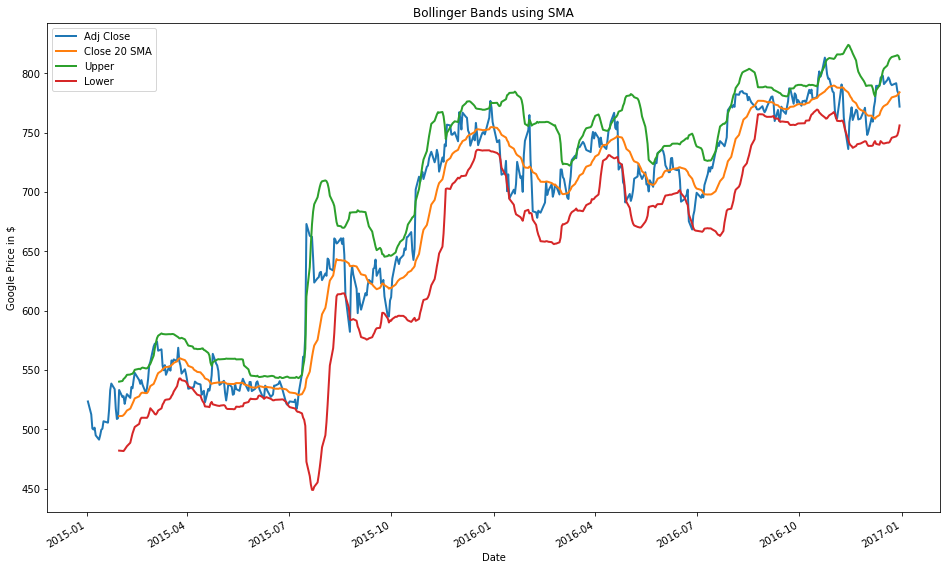

In [47]:
goog_data['Close 20 SMA'] = goog_data['Adj Close'].rolling(window=20).mean()
goog_data['Upper'] = goog_data['Close 20 SMA'] + 2 * (goog_data['Adj Close'].rolling(window=20).std())
goog_data['Lower'] = goog_data['Close 20 SMA'] - 2 * (goog_data['Adj Close'].rolling(window=20).std())


goog_data[['Adj Close', 'Close 20 SMA', 'Upper', 'Lower']].plot(figsize=(16,10), lw=2)
plt.title('Bollinger Bands using SMA')
plt.ylabel('Google Price in $')

<h2>Bollinger Bands  with EMA instead of SMA</h2>

Text(0, 0.5, 'Google Price in $')

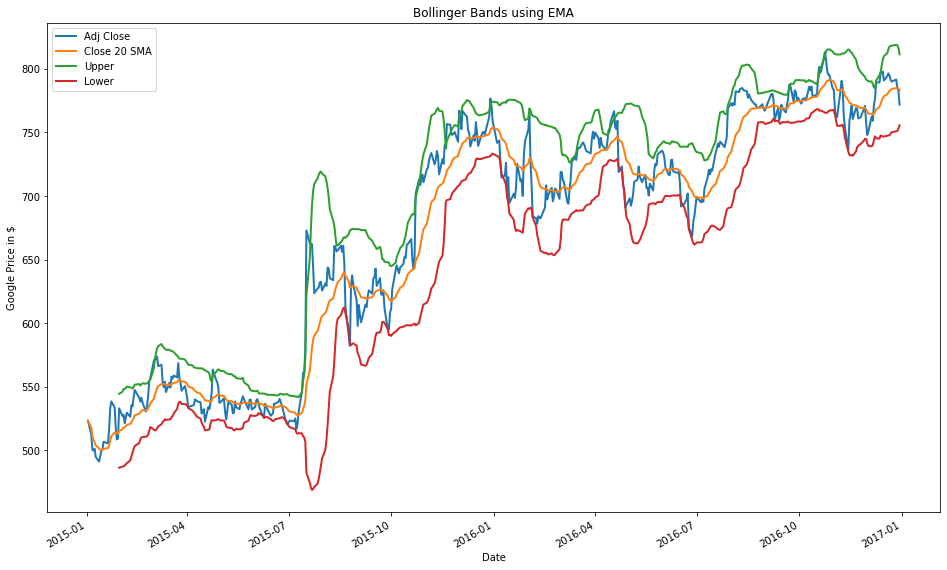

In [48]:
goog_data['Close 20 SMA'] = goog_data['Adj Close'].ewm(span=20).mean()
goog_data['Upper'] = goog_data['Close 20 SMA'] + 2 * (goog_data['Adj Close'].rolling(window=20).std())
goog_data['Lower'] = goog_data['Close 20 SMA'] - 2 * (goog_data['Adj Close'].rolling(window=20).std())


goog_data[['Adj Close', 'Close 20 SMA', 'Upper', 'Lower']].plot(figsize=(16,10), lw=2)
plt.title('Bollinger Bands using EMA')
plt.ylabel('Google Price in $')